In [1]:
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib import rc
import matplotlib.pyplot as plt

from matplotlib import rcParams

latex_path = '/usr/local/texlive/2023/bin/universal-darwin'

rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'

In [2]:
df = pd.read_excel('IVH_ND_Filters.xlsx')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df = df[['subject_id','Msmt #','probe', 'Filters Used', 'Notes']]

In [4]:
spot_df = df[(df['probe']=='NB5')]

In [5]:
spot_df

,subject_id,Msmt #,probe,Filters Used,Notes
8,B125,NaN,NB5,(S1): CAL1034: 0.2 CAL2127: 0.2,"general: \nCALIB_1 (400,504,562,608): 0.2 ND\n..."
9,B095,NaN,NB5,(S1): CAL1034: 0.1 CAL2127: 0.2,"general: \nCALIB_1 (413,494,561,605): ND 0.1\n..."
10,B128,No measurement,NB5,(S1): CAL1034: -8 CAL2127: -8,"general: \nRF_1 (398,466,518,529): disregard"
11,B128,2.0,NB5,(S1): CAL1034: 0.1 CAL2127: 0.2,general: patient extremely fussy so measuremen...
12,B110,15.0,NB5,(S1): CAL1034: CAL2127:,"general: \nCALIB_1 (389,475,545,589): No Filte..."
...,...,...,...,...,...
944,A002,9.0,NB5,NaN,DCS belta is around 1.6. need to look at data
951,A001,6.0,NB5,NaN,None
953,A001,5.0,NB5,NaN,pma 40 wks \nbaby is not happy camper. we only...
956,A001,4.0,NB5,NaN,pma 39 wks\nroom air


In [6]:
filters_used = (spot_df['Filters Used']).to_list()

In [7]:
""""
# Linear Iteration
filter_info = filters_used[6]
i = 0
info = ''
while i < len(filter_info):
    info = info + filter_info[i]
    i = i+1
    print('1st')
    print('')
    print(info)
    print('')
    #Once S1 is in info we start looking for the different filters

    if 'S1' in info:
        print('S1 in info')
        print('')
        print(info)
        filters_copy = filters.copy()
        info = ''
        i = i + 1
        info = info + filter_info[i]

        #while we haven't reach the S2 measurments we will look into the first session filters
        while 'S2' not in info and i < len(filter_info):
            print(info)
            print('')
            if 'CAL' in info and len(info) > 6 :
                print('CAL in info and len(info) > 6')
                print('')
                print(info)
                print('')

                for index, fil in enumerate(filters_copy):
                    if fil in info: 
                        filter_found = True
                        print(fil) 
                        current_filter = fil
                        del filters_copy[index]
                        break
                    else: filter_found = False;  print('F')
                print(info + '  Hola')
                if not filter_found: 
                    print('not filter_found')
                    i = i +1; info = info + filter_info[i] 


                while filter_found: 
                    print('while')
                    print(filter_found)
                    if '.' in info:
                        print('. found')
                        value = filter_info[i-1:i+2]
                        array = filters_dict[fil] 
                        array = np.append(array,float(value))
                        filters_dict[fil] = array
                        info = ''
                        i = i+1; info = info + filter_info[i]
                        filter_found = False
                        print(filter_found)

                    else: 
                        if any(word.lower() in info.lower() for word in ['none', 'na', 'notes']):
                            print('info '+ info)
                            info = ''
                            filter_found = False
                            print(filter_found)

                        print('not found yet')
                        print(filter_found)
                        print(info)
                        i = i+1; info = info + filter_info[i] 

            else: 
                #print(i)
                i = i+1; 
                try:
                    info = info +filter_info[i] 
                except: break

"""

'"\n# Linear Iteration\nfilter_info = filters_used[6]\ni = 0\ninfo = \'\'\nwhile i < len(filter_info):\n    info = info + filter_info[i]\n    i = i+1\n    print(\'1st\')\n    print(\'\')\n    print(info)\n    print(\'\')\n    #Once S1 is in info we start looking for the different filters\n\n    if \'S1\' in info:\n        print(\'S1 in info\')\n        print(\'\')\n        print(info)\n        filters_copy = filters.copy()\n        info = \'\'\n        i = i + 1\n        info = info + filter_info[i]\n\n        #while we haven\'t reach the S2 measurments we will look into the first session filters\n        while \'S2\' not in info and i < len(filter_info):\n            print(info)\n            print(\'\')\n            if \'CAL\' in info and len(info) > 6 :\n                print(\'CAL in info and len(info) > 6\')\n                print(\'\')\n                print(info)\n                print(\'\')\n\n                for index, fil in enumerate(filters_copy):\n                    if fil

In [8]:

def changing_limiting_values(counter,info,value_1,value_2,string_value,filters_to_find,ses_dicts,note_dict,filt_idx):
    if value_1 in info:
        #print(value_1 + ' in info')
        #print('')
        #print(info)
        filters_copy = filters_to_find.copy()
        info = ''
        counter = counter + 1
        info = info + string_value[counter]

        #while we haven't reach the S2 measurments we will look into the first session filters
        while value_2 not in info and counter < len(string_value):
            #print(info)
            #print('')
            if 'CAL' in info and len(info) > 6 :
                #print('CAL in info and len(info) > 6')
                #print('')
                #print(info)
                #print('')

                for index, fil in enumerate(filters_copy):
                    if fil in info: 
                        filter_found = True
                        #print(fil) 
                        del filters_copy[index]
                        break
                    else: filter_found = False;  
                
                if not filter_found: 
                    #print('not filter_found')
                    counter = counter +1; 
                    try: info = info + string_value[counter] 
                    except: break


                while filter_found: 
                    if '.' in info:
                        value = string_value[counter-1:counter+2]
                        array = ses_dicts[value_1][fil] 
                        array = np.append(array,float(value))
                        ses_dicts[value_1][fil]  = array
                        info = ''
                        counter = counter+1; info = info + string_value[counter]
                        filter_found = False

                    else: 
                        if any(word.lower() in info.lower() for word in ['none', 'na', 'notes', 'no filter']):
                            if 'notes' in info: 
                                note_array = note_dict[value_1][fil] 
                                note_array = np.append(note_array, filt_idx)
                                note_dict[value_1][fil] = note_array
                            info = ''
                            filter_found = False

                        counter = counter+1; 
                        try: info = info + string_value[counter] 
                        except: break
                        

            else: 
                #print(i)
                counter = counter+1; 
                try:
                    info = info +string_value[counter] 
                except: break
    return ses_dicts, note_dict, counter, info

In [9]:
def find_values_between_strvalues(string_value_to_analyze,limiting_str_values,values_to_find,s_dicts,nots_dict,filter_index):
     
    i = 0
    info = ''
    lim_value_counter = 0
    time_to_break = False

    while i < len(string_value_to_analyze): 
        info = info + string_value_to_analyze[i]
        i = i+1
        #print('1st')
        #print('')
        #print('info ' +info)
        #print('')
        #print(limiting_str_values[lim_value_counter])
        
        if limiting_str_values[lim_value_counter] in info:
            if info in string_value_to_analyze:
                lim_value_1 = limiting_str_values[lim_value_counter]
                #print(lim_value_counter)
                #print(len(limiting_str_values) - 1 )
                if lim_value_counter == len(limiting_str_values) - 1 :
                    #print('Entered 2nd if')
                    lim_value_2= 'shgkjsdhag'; time_to_break = True

                else: lim_value_2 = limiting_str_values[lim_value_counter + 1]

            s_dicts,nots_dict,i,info2 = changing_limiting_values(i,info,lim_value_1,lim_value_2,string_value_to_analyze,values_to_find,s_dicts,nots_dict,filter_index)
            lim_value_counter = lim_value_counter + 1
            info = info2
            i = i+1
        
        if time_to_break:
            break
        #print('while info: ' +info)
    
    return s_dicts, nots_dict

In [10]:
#filter_info = filters_used[8]
i = 0
info = ''
filters_dict = {}
filters_dict['1034']=[]; filters_dict['1084'] = []; filters_dict['2127'] =[];
sesion_dicts = {}
sesion_dicts['S1'] = filters_dict.copy();sesion_dicts['S2'] = filters_dict.copy(); sesion_dicts['S3'] = filters_dict.copy() 
notes_dict = {}
notes_dict['S1'] = filters_dict.copy();notes_dict['S2'] = filters_dict.copy(); notes_dict['S3'] = filters_dict.copy() 

filters = ['1034', '1084', '2127']
exceptions = []
no_session = []
discarded = []
# A function to find values between string values in this case between 'S1' and 'S2'
limiting_str_values = ['S1','S2', 'S3']

for f_index,filter_ in enumerate(filters_used):
    
    limiting_str_values = ['S1','S2', 'S3']
  
    if 'nan' == str(filter_): 
        discarded = np.append(discarded,f_index)
        #print(str(f_index)+ ' discarded')

    elif '+' in filter_:
        exceptions = np.append(exceptions,f_index)
        #print(str(f_index)+ ' is an exception +')

    
    elif filter_== 'none':
        #print(str(f_index) + ' discarded')
        discarded = np.append(discarded,f_index)


   
        

    elif limiting_str_values[0] in filter_:

        for idx, lim_value, in reversed(list(enumerate(limiting_str_values))):
            if lim_value not in filter_:
                del limiting_str_values[idx]
            else: break

        sesion_dicts,notes_dict = find_values_between_strvalues(filter_,limiting_str_values,filters,sesion_dicts,notes_dict,f_index)
    
    else: 
        #print(str(f_index) + ' is an exception --> no session'); 
        no_session = np.append(no_session,f_index)

In [11]:
sesion_dicts

{'S1': {'1034': array([0.2, 0.1, 0.1, 0.1, 0.5, 0.1, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.3,
         0.2, 0.2, 0.3, 0.3, 0.1, 0.2, 0.1, 0.1, 0.4, 0.2, 0.1, 0.1, 0.2,
         0.1, 0.2, 0.2, 0.3, 0.1, 0.1, 0.1, 0.4, 0.3, 0.2, 0.2, 0.1, 0.1,
         0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
         0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
         0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1]),
  '1084': array([0.1, 0.2, 0.1, 0.1, 0.2, 0.2, 0.1, 0.2]),
  '2127': array([0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.6, 0.2, 0.3, 0.3, 0.2, 0.2,
         0.2, 0.2, 0.6, 0.3, 0.3, 0.4, 0.3, 0.1, 0.3, 0.3, 0.1, 0.2, 0.5,
         0.3, 0.1, 0.1, 0.3, 0.2, 0.1, 0.3, 0.2, 0.3, 0.1, 0.2, 0.1, 0.4,
         0.5, 0.2, 0.3, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2,
         0.2, 0.2, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
         0.2, 0

In [12]:
notes_dict

{'S1': {'1034': array([ 28.,  48.,  55.,  62.,  67.,  85., 115., 116.]),
  '1084': array([114.]),
  '2127': array([ 28.,  48.,  55.,  62.,  67.,  85., 115., 116.])},
 'S2': {'1034': array([ 48.,  55.,  62.,  67., 115., 116.]),
  '1084': [],
  '2127': array([ 48.,  55.,  62.,  67., 115., 116.])},
 'S3': {'1034': array([ 48., 116.]), '1084': [], '2127': array([ 48., 116.])}}

In [13]:
exceptions

array([57., 74., 78., 79., 86.])

In [14]:
no_session

array([123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       135., 137., 138., 139., 141.])

## MANUAL PROCESSING

In [15]:
for exception in exceptions: 
    print(filters_used[int(exception)])

(S1): CAL1034: 0.2 CAL2127: 0.2 (S2): CAL1034: 0.3+0.1 CAL2127: 0.6
(S1): CAL1034: 0.3 ND CAL2127: 0.1 + 0.3 ND (S2): CAL1034: 0.5 ND CAL2127: 0.5 ND + 0.1 ND
(S1): CAL1034: 0.1 + 0.5 ND CAL2127: 0.7 ND
(S1): CAL1034: 0.3 + 0.1 CAL2127: 0.5
(S1): CAL1034: 0.2 ND + 0.3 ND CAL2127: 0.6 ND + 0.1 ND


In [16]:
# This is the sum + exceptions

S1_1034_Sum = [0.2,0.3,0.6,0.4,0.5]
S1_2127_Sum = [0.2,0.4,0.7,0.5,0.7]
S2_1034_Sum = [0.4,0.5]
S2_2127_Sum = [0.6,0.6]


In [17]:
notes_dict['S2']['1034']

array([ 48.,  55.,  62.,  67., 115., 116.])

In [18]:
notes_dict['S2']['2127']

array([ 48.,  55.,  62.,  67., 115., 116.])

In [19]:
notes_list = spot_df['Notes'].to_list()
notes_list[141]

'general: At start of msmt was informed of DCS issue that had been evolving over the day \nCALIB_1 (601,753,835,879): ignore, NIRS cnts way too low \nCAL1084_1 (601,753,835,879): ignore, NIRS cnts way too low \nCAL2127_1 (601,753,835,879): ignore, NIRS cnts way too low \nCAL2127_2 (601,753,835,879): ignore, NIRS cnts way too low \nRF_1 (601,753,835,879): ignore, NIRS cnts way too low \nRF_2 (601,753,835,879): ignore, NIRS cnts way too low \nCALIB_2 (701,853,955,1000): ignore, after setting NIRS cnts snapped back and were way too high \nCALIB_3 (561,713,815,877): 0.2 filter - good at time of calibration, filter is too high for the end of the msmt \nLF_1 (561,713,815,877): \nLF_2 (561,713,815,877): \nLF_3 (561,713,815,877): \nMF_1 (561,713,815,877): \nMF_2 (561,713,815,877): \nMF_3 (561,713,815,877): breif sats at end\nRF_3 (561,713,815,877): \nRF_4 (561,713,815,877): \nRF_5 (561,713,815,877): \nCAL1084_2 (561,713,815,877): 0.2 FILTER (now too low for NIRS gains) (good!)\nCAL2127_3 (561,

In [20]:
S1_1034_notes = [0.1,0.8,0.2,0.2,0.2,0.6,0.2,0.1]
S1_2127_notes = [0.2,0.1,0.3,0.2,0.3,0.7,0.3,0.1,0.1]
len(S1_2127_notes) == len(S1_1034_notes)
print('They will not match because there is one extra found in the no session')

They will not match because there is one extra found in the no session


In [21]:
S2_1034_notes = [0.1,0.2,0.3,0.5,0.4,0.4]
S2_2127_notes = [0.1,0.2,0.5,0.8,0.5,0.2]
len(S2_1034_notes) == len(S2_2127_notes)

True

In [22]:
S3_1034_notes = [0.2, 0.5]
S3_2127_notes = [0.2, 0.5]
len(S3_1034_notes) == len(S3_2127_notes)

True

In [23]:
no_session

array([123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       135., 137., 138., 139., 141.])

In [24]:
for ns in no_session:
    
    print(filters_used[int(ns)])

0.1 on 2127
0.1 on both
0.1 on 2127
0.1 on 2127
0.1 on 2127
0.1 on all blocks
0.1 on 2127, unclear about 1084
0.1 on both
0.1 on 1084, 0.2 on 2127
0.1 on 1084, 0.2 on 2127
0.1 on 2127
S2 0.1 on 2127
0.1 on both
0.1 on both
0.1 on 2127
see notes


In [25]:
no_session_dict = {}
no_session_dict['1034'] = [0.1,0.1,0.1,0.1,0.1]
no_session_dict['2127'] = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]


In [26]:
S1_1034 = sesion_dicts['S1']['1034']
S1_2127 = sesion_dicts['S1']['2127']
S2_1034 = sesion_dicts['S2']['1034']
S2_2127 = sesion_dicts['S2']['2127']

In [27]:
S1_1034 = np.append(S1_1034,S1_1034_Sum); S1_1034 = np.append(S1_1034,S1_1034_notes)
S1_2127 = np.append(S1_2127,S1_2127_Sum); S1_2127 = np.append(S1_1034,S1_2127_notes)
S2_1034 = np.append(S2_1034,S2_1034_Sum); S2_1034 = np.append(S2_1034,S2_1034_notes)
S2_2127 = np.append(S2_2127,S2_2127_Sum); S2_2127 = np.append(S2_1034,S2_2127_notes)


In [28]:
sesion_dicts['S1']['1034'] = S1_1034 
sesion_dicts['S1']['2127'] = S1_2127
sesion_dicts['S2']['1034'] = S2_1034
sesion_dicts['S2']['2127'] = S2_2127

In [29]:
total_1034 = np.concatenate([sesion_dicts['S1']['1034'],sesion_dicts['S2']['1034']])
total_2127 = np.concatenate([sesion_dicts['S1']['2127'],sesion_dicts['S2']['2127']])

In [40]:
total_bins = np.round(np.arange(0.1,1.1,0.1),3)
unique_values_1034, counts_1034 = np.unique(total_1034, return_counts=True)
unique_values_1034 = np.append(unique_values_1034,np.zeros(len(total_bins) - len(unique_values_1034))); unique_values_1034 = np.round(unique_values_1034,3)
counts_1034 = np.append(counts_1034,np.zeros(len(total_bins) - len(counts_1034)))

unique_values_2127, counts_2127 = np.unique(total_2127, return_counts=True)
unique_values_2127 = np.append(unique_values_2127,np.zeros(len(total_bins) - len(unique_values_2127))); unique_values_2127 = np.round(unique_values_2127,3)
counts_2127 = np.append(counts_2127,np.zeros(len(total_bins) - len(counts_2127)))

In [38]:
unique_values = unique_values_2127; counts = counts_2127
indxes = np.arange(0,10,1)

for l in range(0,len(indxes)):
    if unique_values[l] == total_bins[l]:
        pass
    else: 
        unique_values = np.insert(unique_values, l, total_bins[l]); 
        unique_values =  unique_values[:-1]
        counts = np.insert(counts, l, 0); 
        counts =  counts[:-1]

counts_2127 = counts

 

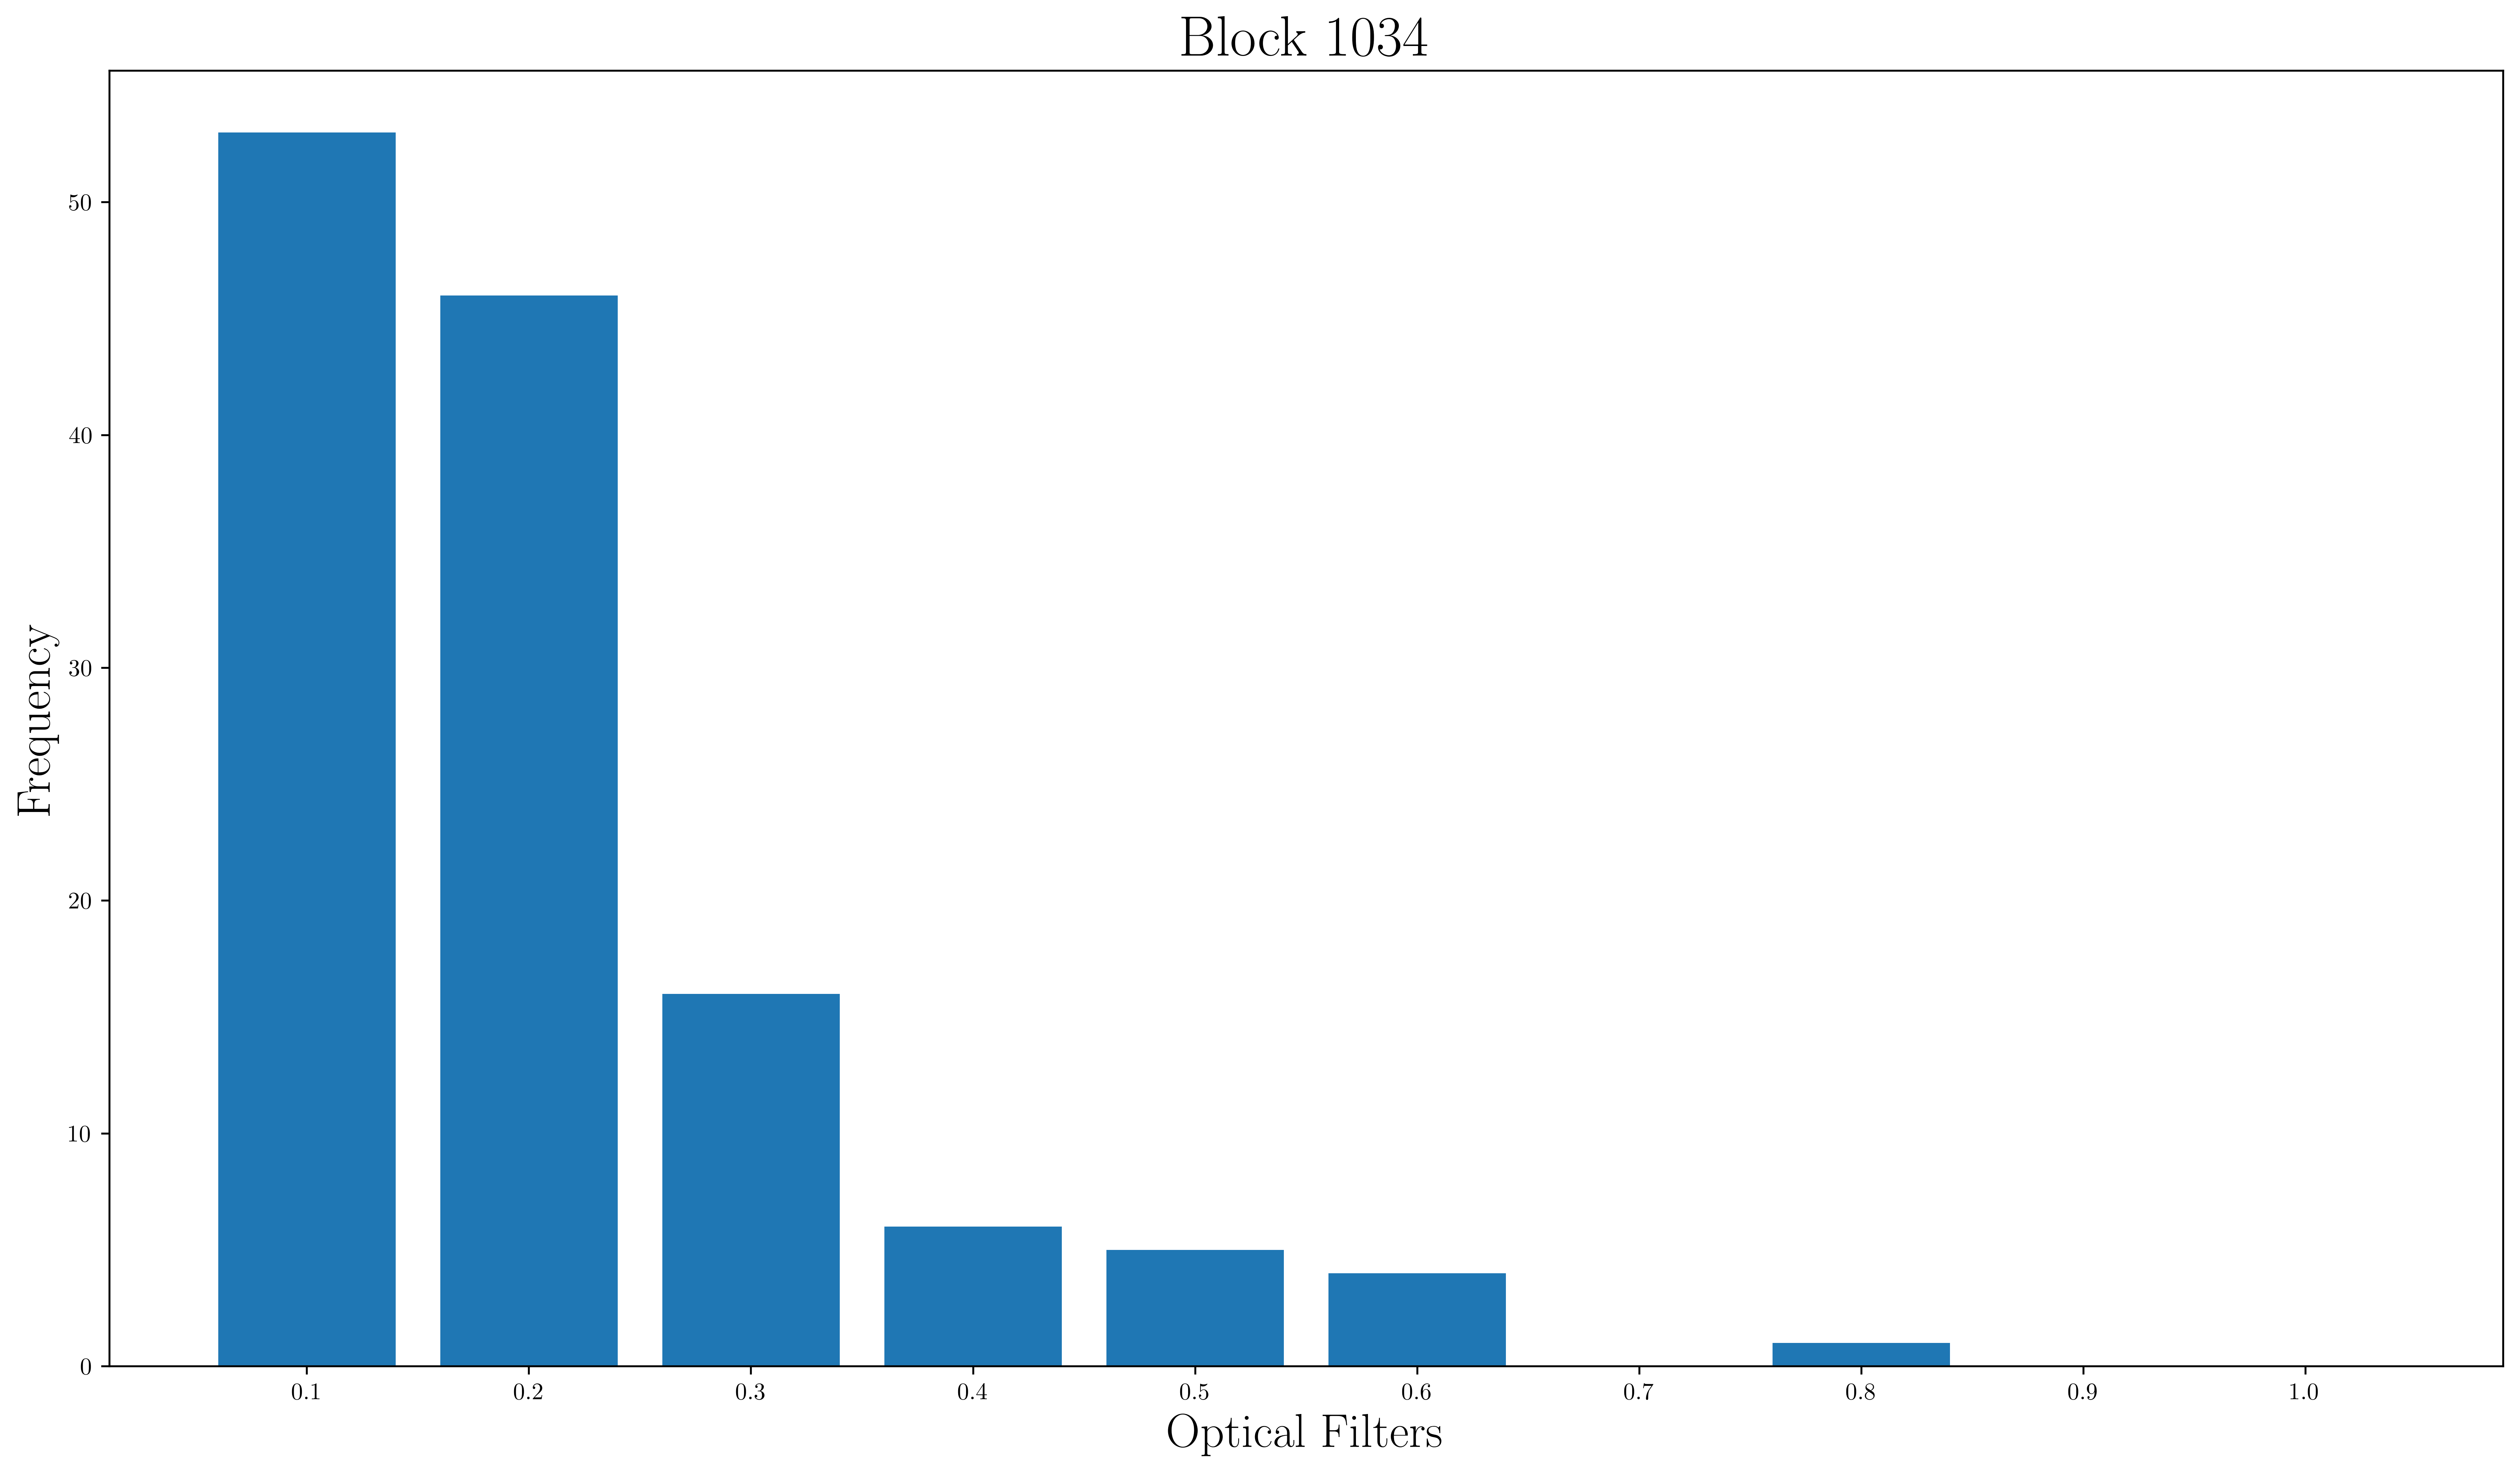

In [36]:
fig, axs = plt.subplots(figsize=(18, 10), dpi=500)
bins = np.arange(0.1, 1.1, 0.1) 
custom_labels = np.round(np.arange(0.1,1.1,0.1),3)
axs.bar(total_bins*10, counts_1034)
plt.xticks(total_bins*10, custom_labels)
#axs.hist(total_1034, color='blue', edgecolor='black', bins = 10, alpha=0.7)
plt.xlabel("Optical Filters", fontsize=20) ; plt.ylabel("Frequency", fontsize=20) 
plt.title("Block 1034", fontsize=24);


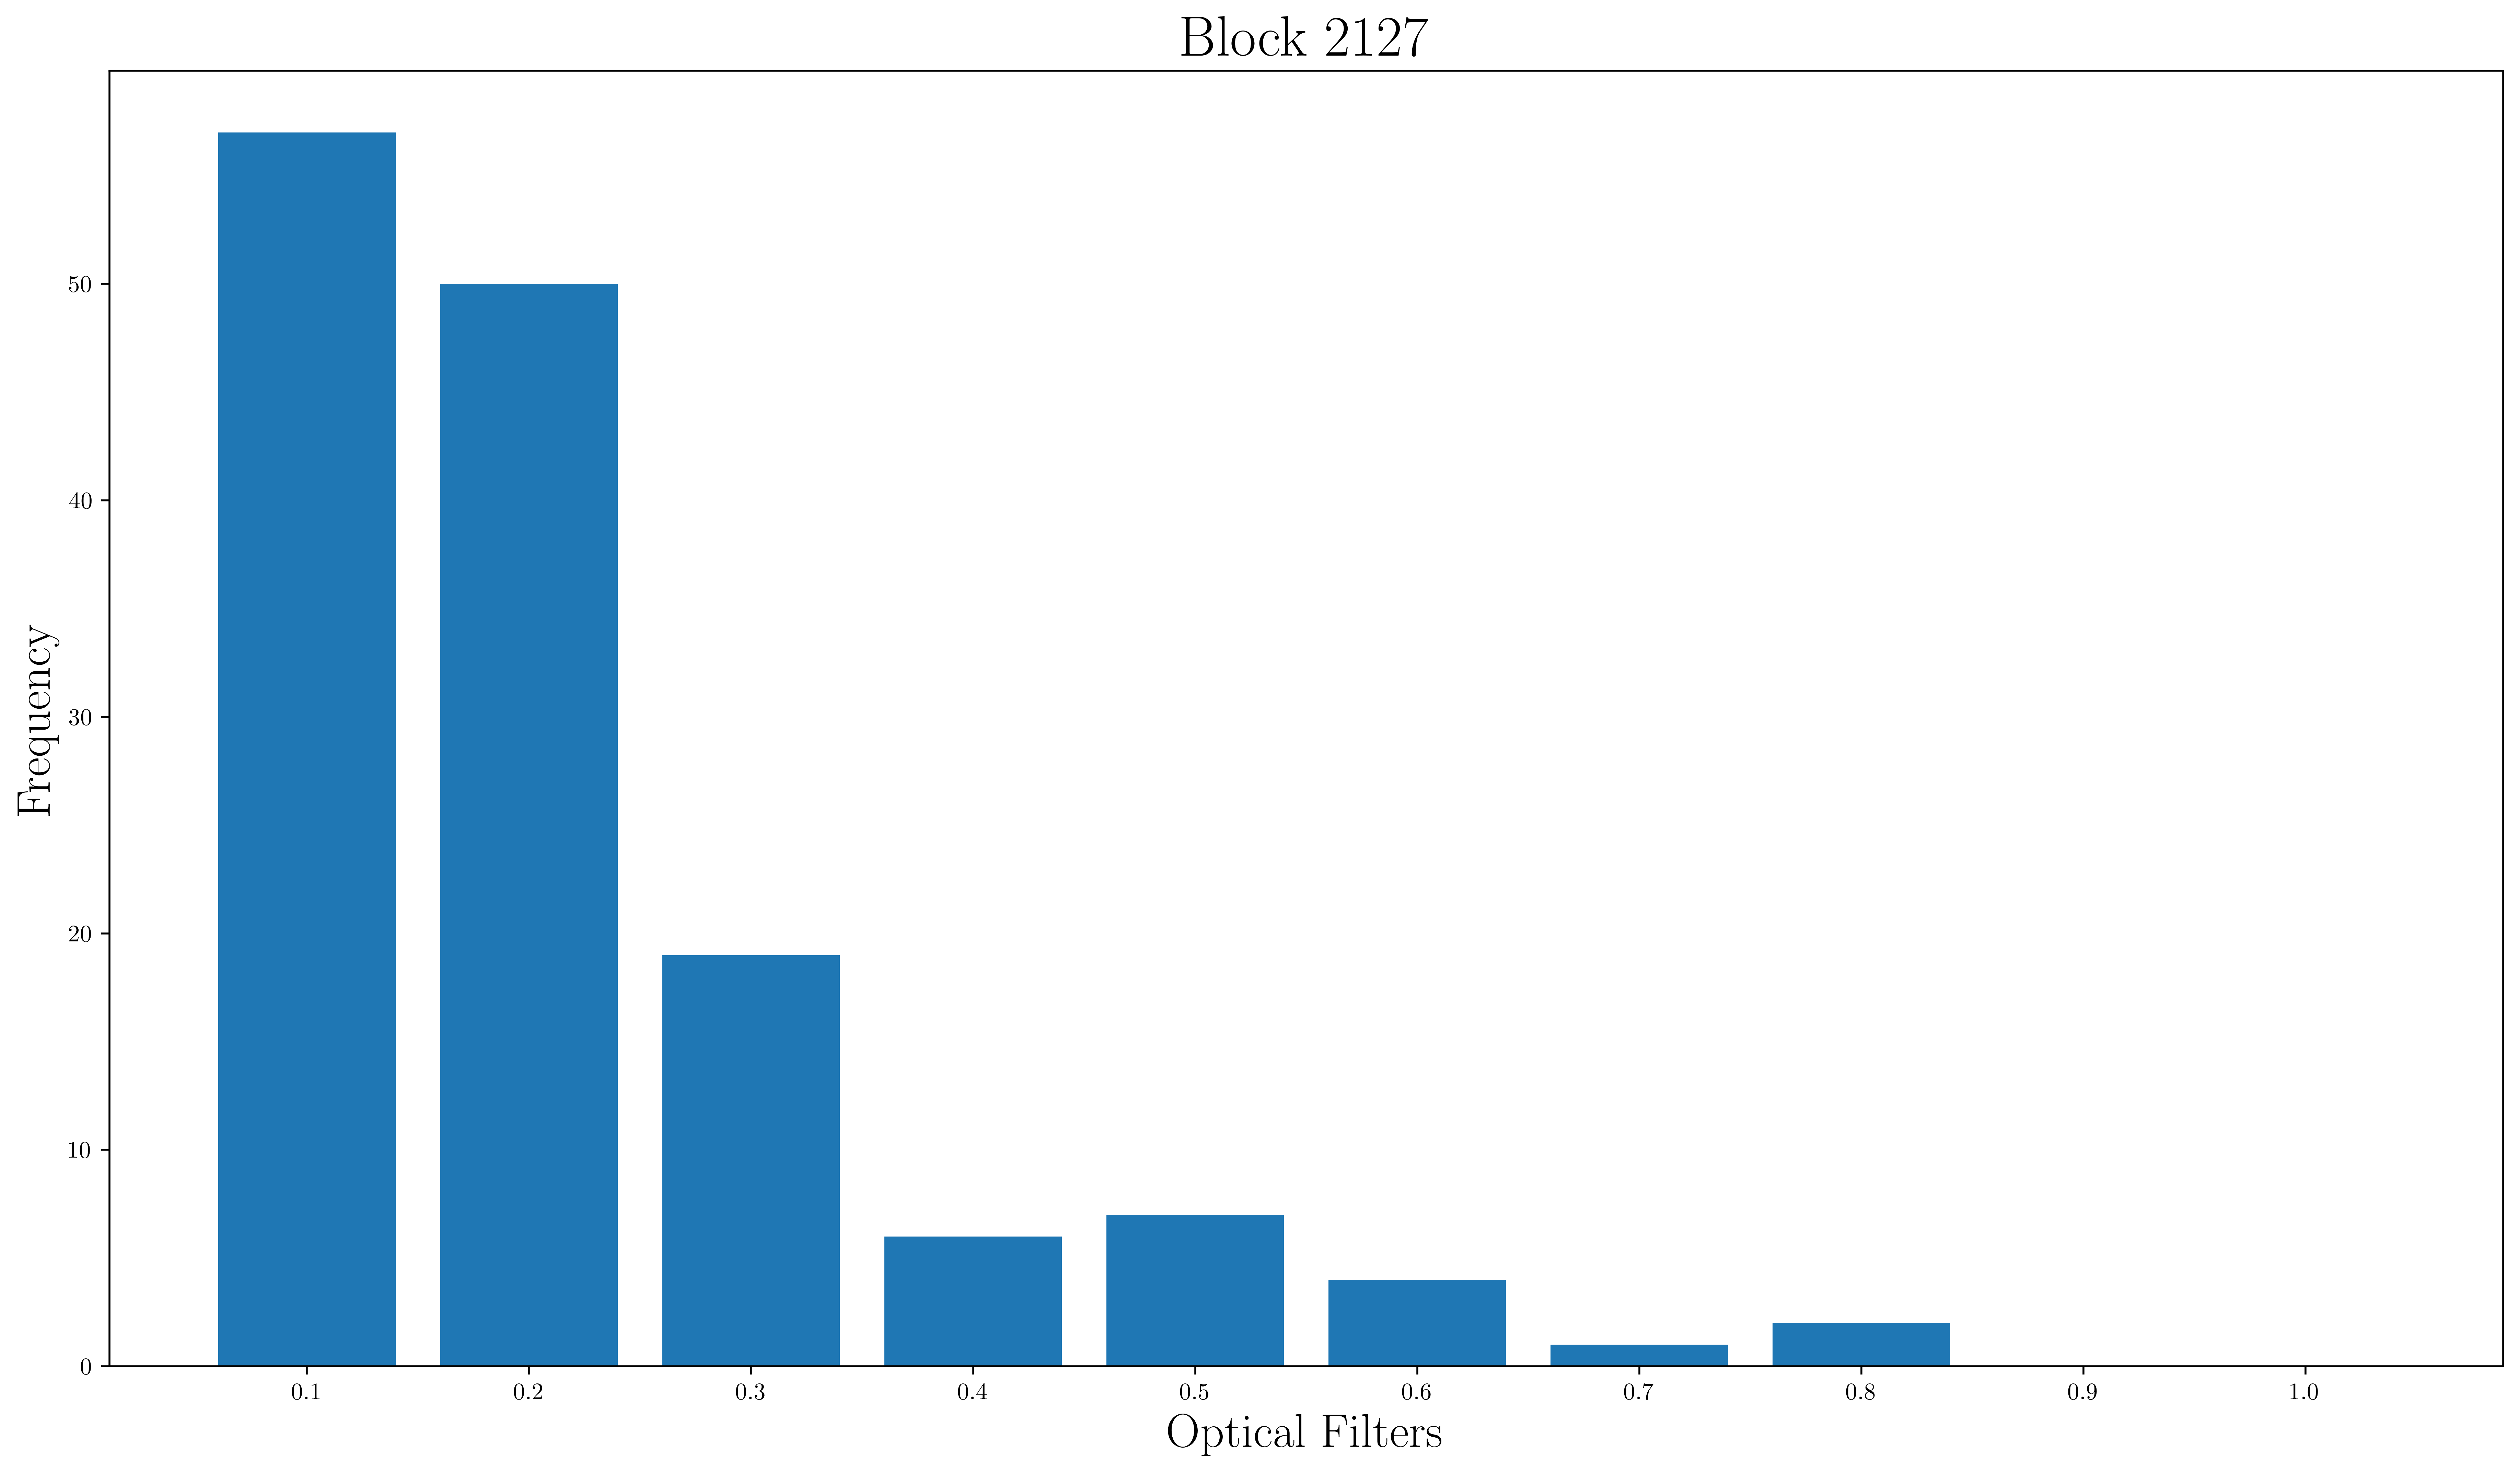

In [39]:
fig, axs = plt.subplots(figsize=(18, 10), dpi=500)
bins = np.arange(0.1, 1.1, 0.1) 
custom_labels = np.round(np.arange(0.1,1.1,0.1),3)
axs.bar(total_bins*10, counts_2127)
plt.xticks(total_bins*10, custom_labels)
#axs.hist(total_1034, color='blue', edgecolor='black', bins = 10, alpha=0.7)
plt.xlabel("Optical Filters", fontsize=20) ; plt.ylabel("Frequency", fontsize=20) 
plt.title("Block 2127", fontsize=24);
